In [23]:
from ucimlrepo import fetch_ucirepo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

In [2]:
dry_bean = fetch_ucirepo(id=602)
X = dry_bean.data.features
y = dry_bean.data.targets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'Standardization': StandardScaler(),
    'Robust Scaling': RobustScaler()
}

In [26]:
model = KNeighborsClassifier(n_neighbors = 5)

In [36]:
accuracies = {}

In [86]:
for name, scaler in scalers.items():
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    model.fit(X = X_train_s, y = y_train)
    y_pred = model.predict(X_test_s)
    accuracies[name] = accuracy_score(y_pred = y_pred, y_true = y_test)  
    # accuracy = accuracy_score(y_test, y_pred)  

c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [87]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
9480,48233,837.447,323.237083,191.463072,1.688248,0.805695,48934,247.814775,0.695401,0.985675,0.864250,0.766666,0.006702,0.001428,0.587776,0.992312
6775,56733,923.164,363.198193,200.095054,1.815128,0.834555,57297,268.765137,0.815821,0.990157,0.836542,0.739996,0.006402,0.001184,0.547594,0.993953
5766,45666,870.017,350.539258,166.393795,2.106685,0.880159,46356,241.130166,0.613016,0.985115,0.758136,0.687883,0.007676,0.001060,0.473184,0.996849
227,34623,675.213,228.194371,193.503300,1.179279,0.530035,34965,209.960408,0.759576,0.990219,0.954318,0.920095,0.006591,0.002914,0.846574,0.998347
7113,60716,984.188,404.263088,192.452036,2.100591,0.879415,61532,278.039587,0.819291,0.986739,0.787693,0.687769,0.006658,0.000919,0.473026,0.993635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,83266,1117.778,448.473710,237.747098,1.886348,0.847920,84030,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319
13418,39857,755.392,283.623668,179.430885,1.580685,0.774448,40330,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183
5390,90004,1156.599,456.836383,252.353553,1.810303,0.833583,90790,338.521273,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035
860,38426,711.412,246.696608,198.555756,1.242455,0.593467,38799,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826


In [88]:
accuracies

{'MinMaxScaler': 0.9187444345503116,
 'Standardization': 0.9196349065004452,
 'Robust Scaling': 0.918967052537845}

In [42]:
import matplotlib.pyplot as plt
# plt.plot()

In [44]:
accuracies.values()

dict_values([0.8764470169189671, 0.9203027604630454, 0.9167408726625111])

<BarContainer object of 3 artists>

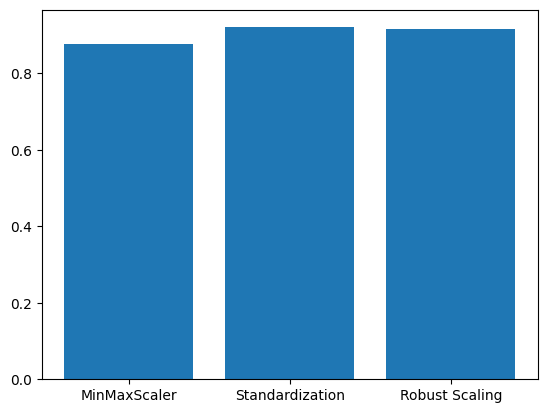

In [47]:
plt.bar(accuracies.keys(), accuracies.values())

In [103]:
rec = {
    'Area': 42020,
    'Perimeter': 674.16,
    'MajorAxisLength': 208.81,
    'MinorAxisLength': 162.14,
    'AspectRatio': 1.29,
    'Eccentricity': 0.5174,
    'ConvexArea': 42530,
    'EquivDiameter': 231.01,
    'Extent': 0.7213,
    'Solidity': 0.9880,
    'Roundness': 0.5,
    'Compactness': 0.5,
    'ShapeFactor1': 0.4949,
    'ShapeFactor2': 0.9637,
    'ShapeFactor3': 0.9975,
    'ShapeFactor4': 0.9128
}

In [104]:
rec_df = pd.DataFrame([rec])

In [105]:
print(model.predict(rec_df)[0])

BOMBAY


c:\Dev\ML-LAB\LAB-Study\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [106]:
for name, scaler in scalers.items():
    print(name, model.predict(scaler.transform(rec_df)))

MinMaxScaler ['DERMASON']
Standardization ['DERMASON']
Robust Scaling ['DERMASON']
